#* Load Data

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive"

In [ ]:
!unzip -q "/content/drive/My Drive/Intern/news.zip"

In [ ]:
import pandas as pd 
import numpy as np

news=pd.read_csv('news.csv')
#df=pd.read_csv('train.csv')

In [ ]:
news.head(2)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE


In [ ]:
df.head(2)

,text,target
0,You Can Smell Hillary’s Fear Daniel Greenfield...,FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,FAKE


In [ ]:
news["label"]= news["label"].replace('FAKE', 0)
news["label"]= news["label"].replace('REAL', 1)
news['label']=news['label'].astype(np.int8)

In [ ]:
news=news.rename(columns={"Unnamed: 0": "id", "label": "target"})

In [ ]:
news['text']=news['title']+" "+news['text']

In [ ]:
news=news[["text","target"]]

In [ ]:
news['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [ ]:
import random
dfs=[df,news]
n = np.sum(len(df.columns) for df in dfs)
df=pd.concat(dfs).iloc[:, random.sample(range(n), n)]

In [ ]:
frames=[df,news]
df = pd.concat(frames)
df.shape

(13948, 2)

In [ ]:
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df=news

In [ ]:
df

,text,target
0,You Can Smell Hillary’s Fear Daniel Greenfield...,0
1,Watch The Exact Moment Paul Ryan Committed Pol...,0
2,Kerry to go to Paris in gesture of sympathy U....,1
3,Bernie supporters on Twitter erupt in anger ag...,0
4,The Battle of New York: Why This Primary Matte...,1
...,...,...
6330,State Department says it can't find emails fro...,1
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,0
6332,Anti-Trump Protesters Are Tools of the Oligarc...,0
6333,"In Ethiopia, Obama seeks progress on peace, se...",1


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

import nltk
import nltk as nlp
import string
import re

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

# 0. Passive Aggressive Classifier -- 92.50%

In [ ]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
df2=df
labels=df2.target
labels.head()

0    0
1    0
2    1
3    0
4    1
Name: target, dtype: int8

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df2['text'], labels, test_size=0.2, random_state=7)

tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [ ]:
pac=PassiveAggressiveClassifier(max_iter=1000)
pac.fit(tfidf_train,y_train)
#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.5%


In [ ]:
cm1=confusion_matrix(y_test,y_pred, labels=[0,1])
cm1

array([[587,  51],
       [ 44, 585]])

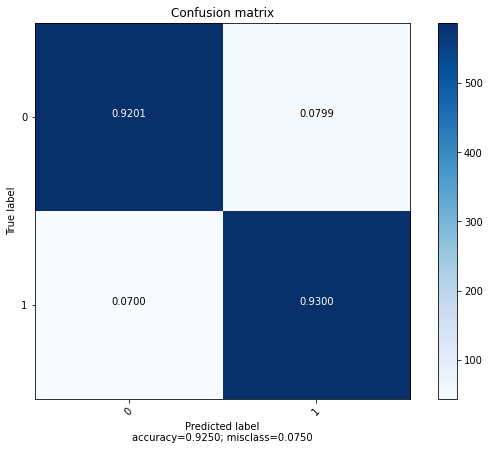

In [ ]:
plot_confusion_matrix(cm1,
                          target_names=[0,1],
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True)

# 1.  Logistic Regression Classifier -- 90.38%

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df['text'], df.target, test_size=0.1, random_state = 212)

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))



accuracy: 90.38%


In [ ]:
cm1=confusion_matrix(y_test,prediction, labels=[0,1])

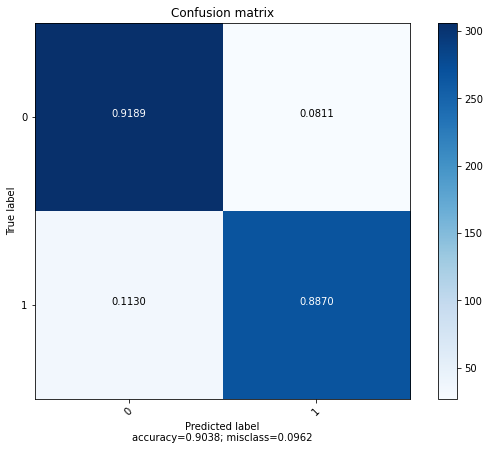

In [ ]:
plot_confusion_matrix(cm1,
                          target_names=[0,1],
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True)

#2. Support Vector Classifier -- 93.69%

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df['text'], df.target, test_size=0.2, random_state=2020)

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LinearSVC())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 93.69%


In [ ]:
cm1=confusion_matrix(y_test,prediction, labels=[0,1])

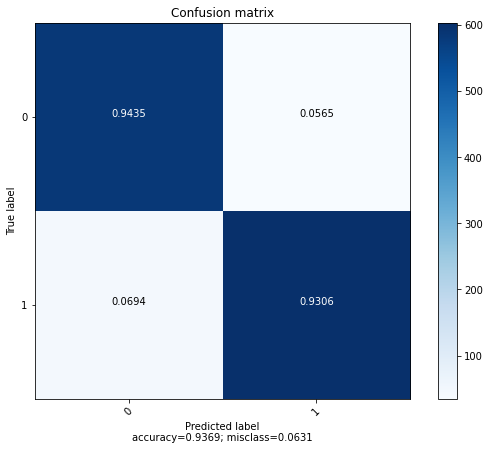

In [ ]:
plot_confusion_matrix(cm1,
                          target_names=[0,1],
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True)

#3. Multinomial Naive Bayes Classifier -- 80.43%

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df['text'], df.target, test_size=0.2, random_state=2020)
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))


accuracy: 80.43%


In [ ]:
cm1=confusion_matrix(y_test,prediction, labels=[0,1])

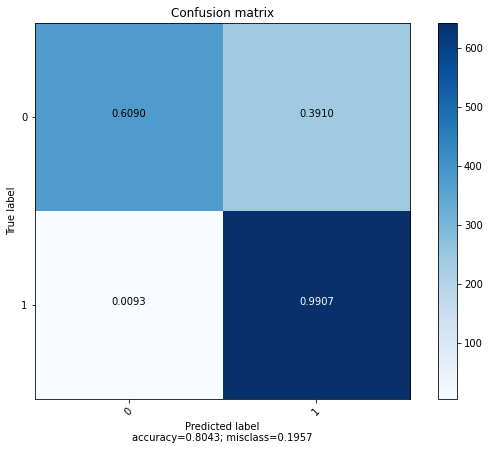

In [ ]:
plot_confusion_matrix(cm1,
                          target_names=[0,1],
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True)

#4. Bernoulli Naive Bayes Classifier -- 81.29%

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df['text'],  df.target, test_size=0.2, random_state=2020)
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', BernoulliNB())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 81.29%


In [ ]:
cm1=confusion_matrix(y_test,prediction, labels=[0,1])

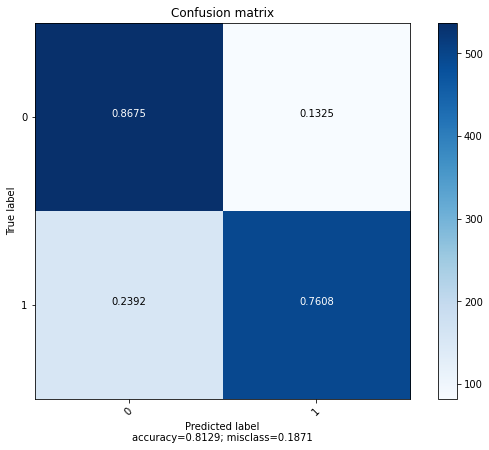

In [ ]:
plot_confusion_matrix(cm1,
                          target_names=[0,1],
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True)

#5. Gradient Boost Classifier -- 80.58%

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df['text'],  df.target, test_size=0.2, random_state=2020)
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', GradientBoostingClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 10,
                                                   max_depth = 5,
                                                   random_state=55))])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 80.58%


In [ ]:
cm1=confusion_matrix(y_test,prediction, labels=[0,1])

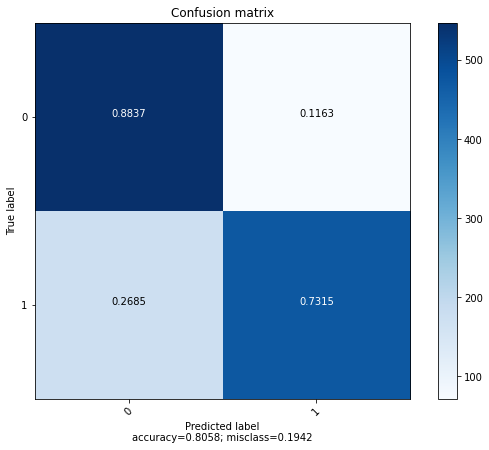

In [ ]:
plot_confusion_matrix(cm1,
                          target_names=[0,1],
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True)

#6. XGBoost Classifier -- 80.51%

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df['text'],  df.target, test_size=0.2, random_state=2020)
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', XGBClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 10,
                                                   max_depth = 5,
                                                   random_state=2020))])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))


accuracy: 80.51%


In [ ]:
cm1=confusion_matrix(y_test,prediction, labels=[0,1])

array([[1259,  247],
       [ 526,  758]])

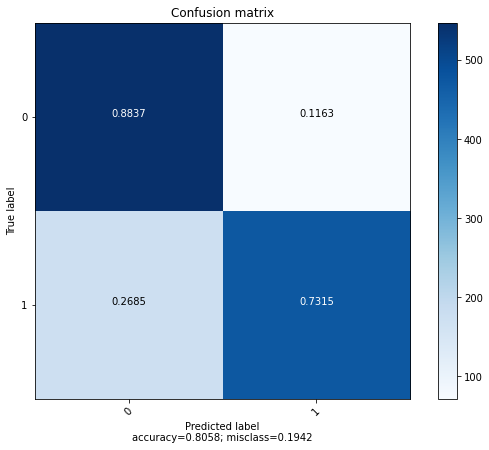

In [ ]:
plot_confusion_matrix(cm1,
                          target_names=[0,1],
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True)

#7. Stochastic Gradient Descent -- 93.61%

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df['text'],  df.target, test_size=0.2, random_state=2020)
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', SGDClassifier())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 93.61%


In [ ]:
cm1=confusion_matrix(y_test,prediction, labels=[0,1])

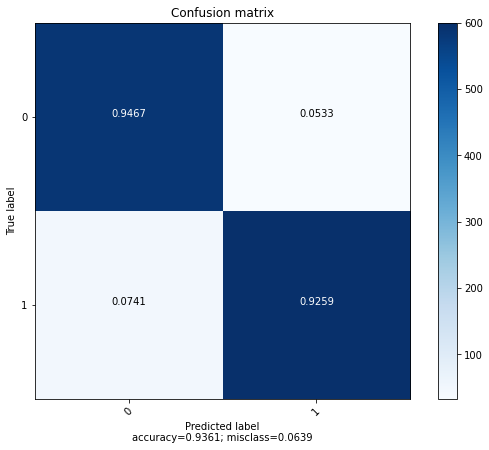

In [ ]:
plot_confusion_matrix(cm1,
                          target_names=[0,1],
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True)

# 8. Decision Tree -- 79.79%

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df['text'],  df.target, test_size=0.2, random_state=2020)

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 10, 
                                           splitter='best', 
                                           random_state=2020))])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 79.79%


In [ ]:
cm1=confusion_matrix(y_test,prediction, labels=[0,1])

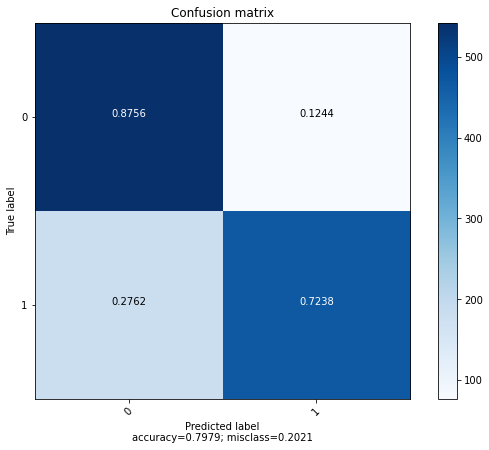

In [ ]:
plot_confusion_matrix(cm1,
                          target_names=[0,1],
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True)

#9. Random Forest Classifier -- 90.45%

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df['text'],  df.target, test_size=0.2, random_state=2020)

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 90.45%


In [ ]:
cm1=confusion_matrix(y_test,prediction, labels=[0,1])

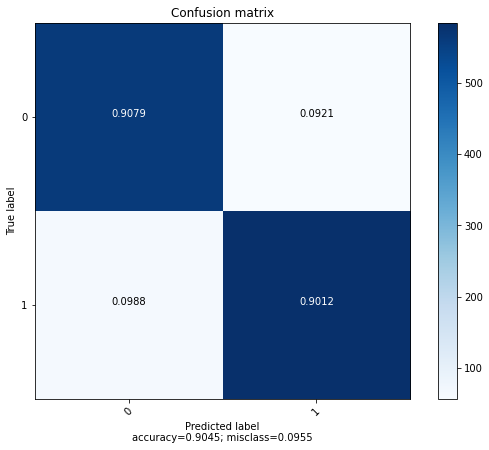

In [ ]:
plot_confusion_matrix(cm1,
                          target_names=[0,1],
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True)

#10. KNN Classifier -- 80.19%

In [ ]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', KNeighborsClassifier(n_neighbors = 10,weights = 'distance',algorithm = 'auto'))])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 80.19%


In [ ]:
cm1=confusion_matrix(y_test,prediction, labels=[0,1])

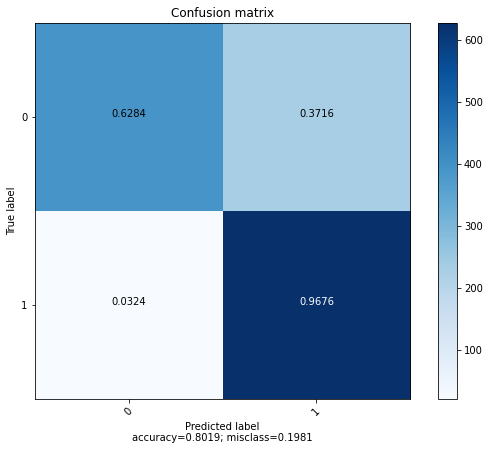

In [ ]:
plot_confusion_matrix(cm1,
                          target_names=[0,1],
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True)

#11. BERT -- 96.52%

In [ ]:
df_train = pd.read_csv('news.csv')#, dtype={'Unnamed: 0': np.int16, 'label': np.int8})

In [ ]:
df_train["label"]= df_train["label"].replace('FAKE', 0)
df_train["label"]= df_train["label"].replace('REAL', 1)
df_train['label']=df_train['label'].astype(np.int8)

In [ ]:
df_train['Unnamed: 0']=df_train['Unnamed: 0'].astype(np.int16)

In [ ]:
df_train=df_train.rename(columns={"Unnamed: 0": "id", "label": "target"})

In [ ]:
print('Training Set Shape = {}'.format(df_train.shape))

NameError: ignored

In [ ]:
df_train=df

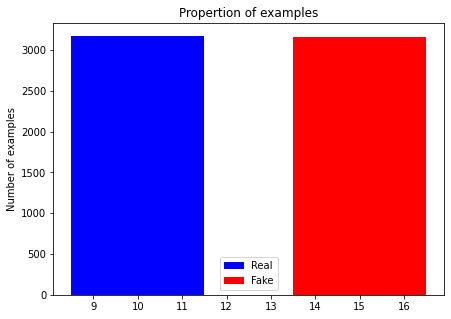

In [ ]:
import matplotlib.pyplot as plt

Real_len = df_train[df_train['target'] == 1].shape[0]
Not_len = df_train[df_train['target'] == 0].shape[0]

# bar plot of the 3 classes
plt.rcParams['figure.figsize'] = (7, 5)
plt.bar(10,Real_len,3, label="Real", color='blue')
plt.bar(15,Not_len,3, label="Fake", color='red')
plt.legend()
plt.ylabel('Number of examples')
plt.title('Propertion of examples')
plt.show()

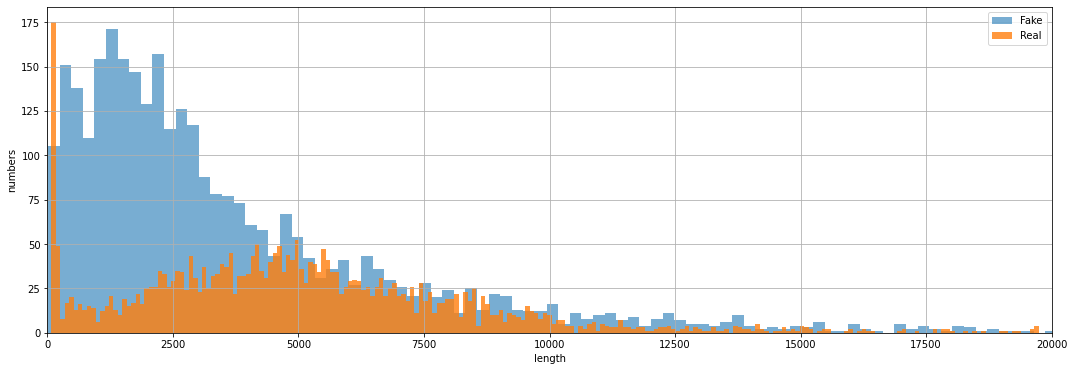

In [ ]:
def length(text):    
    '''a function which returns the length of text'''
    return len(text)
df_train['length'] = df_train['text'].apply(length)

plt.rcParams['figure.figsize'] = (18.0, 6.0)
bins = 500
plt.hist(df_train[df_train['target'] == 0]['length'], alpha = 0.6, bins=bins, label='Fake')
plt.hist(df_train[df_train['target'] == 1]['length'], alpha = 0.8, bins=bins, label='Real')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,20000)
plt.grid()
plt.show()


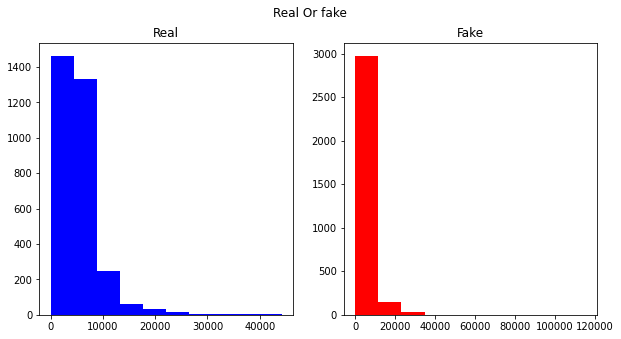

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
df_train_len=df_train[df_train['target']==1]['text'].str.len()
ax1.hist(df_train_len,color='blue')
ax1.set_title('Real')
df_train_len=df_train[df_train['target']==0]['text'].str.len()
ax2.hist(df_train_len,color='red')
ax2.set_title('Fake')
fig.suptitle('Real Or fake')
plt.show()

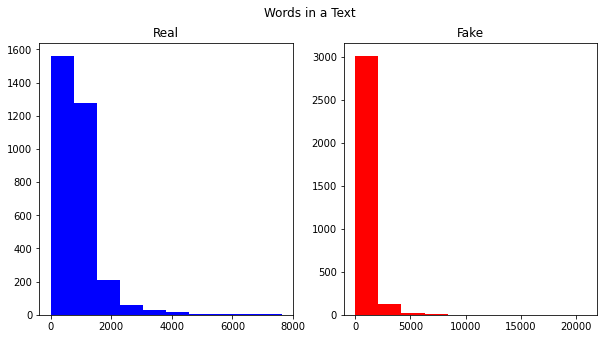

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
df_train_len=df_train[df_train['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(df_train_len,color='blue')
ax1.set_title('Real')
df_train_len=df_train[df_train['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(df_train_len,color='red')
ax2.set_title('Fake')
fig.suptitle('Words in a Text')
plt.show()

Text(0.5, 0.98, 'Average word length in each Text')

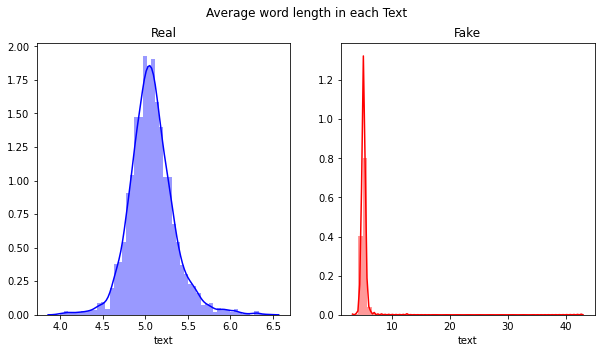

In [ ]:
import seaborn as sns
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=df_train[df_train['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='blue')
ax1.set_title('Real')
word=df_train[df_train['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('Fake')
fig.suptitle('Average word length in each Text')

In [ ]:
!wget --quiet https://raw.githubusercontent.com/tensorflow/models/master/official/nlp/bert/tokenization.py

In [ ]:
!pip3 install sentencepiece

     |████████████████████████████████| 1.0MB 3.4MB/s 


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow_hub as hub

import tokenization

In [ ]:
def bert_encode(texts, tokenizer, max_len=512):
    all_tokens = []
    all_masks = []
    all_segments = []
    
    for text in texts:
        text = tokenizer.tokenize(text)
            
        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len - len(input_sequence)
        
        tokens = tokenizer.convert_tokens_to_ids(input_sequence)
        tokens += [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len
        
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)
    
    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

In [ ]:
def build_model(bert_layer, max_len=512):
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    input_mask = Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
    segment_ids = Input(shape=(max_len,), dtype=tf.int32, name="segment_ids")

    _, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])
    clf_output = sequence_output[:, 0, :]
    out = Dense(1, activation='sigmoid')(clf_output)
    
    model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
    model.compile(Adam(lr=2e-6), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:
%%time
module_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/2"
bert_layer = hub.KerasLayer(module_url, trainable=True)


CPU times: user 25.5 s, sys: 5.29 s, total: 30.8 s
Wall time: 39.9 s


In [ ]:
del model

In [ ]:
shape=df_train.shape
x=shape[0]

In [ ]:
train = df_train [0:int(0.8*x)]
test = df_train[int(0.8*x):int(x)]

In [ ]:
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

In [ ]:
train_input = bert_encode(train.text.values, tokenizer, max_len=252)
test_input = bert_encode(test.text.values, tokenizer, max_len=252)
train_labels = train.target.values

In [ ]:
len(train_labels)

5068

In [ ]:
model = build_model(bert_layer, max_len=252)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 252)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 252)]        0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 252)]        0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 1024), (None 335141889   input_word_ids[0][0]             
                                                                 input_mask[0][0]             

In [ ]:
train_history = model.fit(
    train_input, train_labels,
    validation_split=0.2,
    epochs=10,
    batch_size=4
)

model.save('model.h5')

Epoch 1/10
 292/1014 [=======>......................] - ETA: 17:34 - loss: 0.4561 - accuracy: 0.7723

In [ ]:
print(train_history.history.keys())

In [ ]:
plt.plot(train_history.history['accuracy'])
plt.plot(train_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
testX=test['text']
testy=test['target']

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

lr_probs = model.predict(test_input)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 0]
# predict class values
yhat = model.predict(test_input)
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)


In [ ]:
fig = plt.figure(figsize=(16, 16))          
plot_LSA(y_score,testy)
plt.show()

In [ ]:
testy=np.array(testy)

In [ ]:
lr_f1 = f1_score(testy, yhat.round) 
lr_auc= auc(lr_recall.round, lr_precision.round)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
scores = model.evaluate(test_input,testy, verbose=0)

In [ ]:
print(scores)

In [ ]:
from sklearn.metrics import average_precision_score
y_score = model.predict(test_input)

average_precision = average_precision_score(testy, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

In [ ]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(testy, y_score))

NameError: ignored

In [ ]:
def plot_cm(y_true, y_pred, title, figsize=(5,5)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%' % (p)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%' % (p)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'True label'
    cm.columns.name = 'Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "Blues",linecolor = 'black', annot=annot, fmt='', ax=ax)

In [ ]:
y_score = model.predict(test_input)
y=y_score


In [ ]:
y=y_score.squeeze()

In [ ]:
y1=y
s=[]
for i in range(0,len(y)):
  s.append(round(y1[i]))

In [ ]:
s1=np.array(s, dtype=np.int8)

In [ ]:
plot_cm(testy.values,s1, 'Confusion matrix', figsize=(7,7))

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize
Y = label_binarize(testy, classes=[0, 1])
n_classes = Y.shape[1]
# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(testy[:,i],
                                                        y_score[:,i])
    average_precision[i] = average_precision_score(testy[:,i], y_score[:,i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(testy.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(testy, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

ValueError: ignored

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(model, test_input, testy)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

ValueError: ignored

# 12. EDA

In [ ]:
df_train=news

In [ ]:
Real_len = df_train[df_train['target'] == 1].shape[0]
Not_len = df_train[df_train['target'] == 0].shape[0]

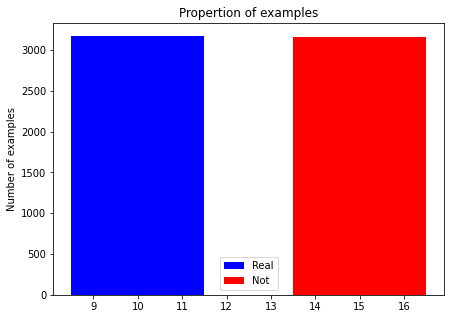

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (7, 5)
plt.bar(10,Real_len,3, label="Real", color='blue')
plt.bar(15,Not_len,3, label="Not", color='red')
plt.legend()
plt.ylabel('Number of examples')
plt.title('Propertion of examples')
plt.show()

In [ ]:
def length(text):    
    '''a function which returns the length of text'''
    return len(text)
df_train['length'] = df_train['text'].apply(length)

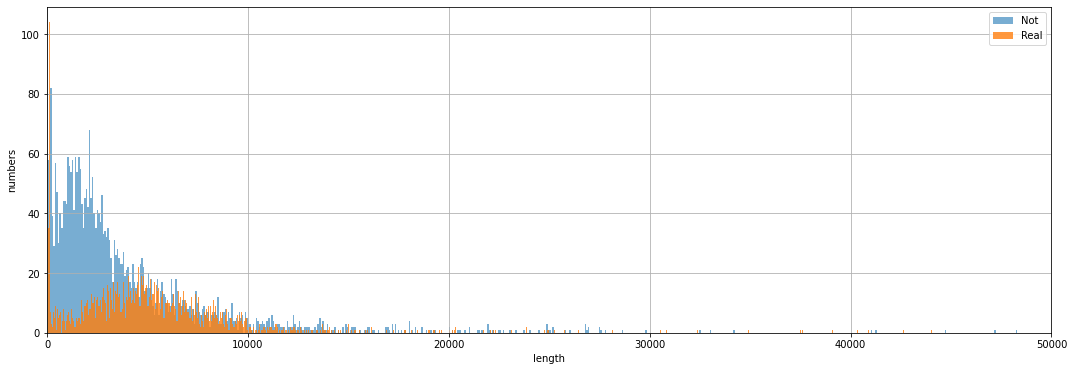

In [ ]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
bins = 1500
plt.hist(df_train[df_train['target'] == 0]['length'], alpha = 0.6, bins=bins, label='Not')
plt.hist(df_train[df_train['target'] == 1]['length'], alpha = 0.8, bins=bins, label='Real')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,50000)
plt.grid()
plt.show()

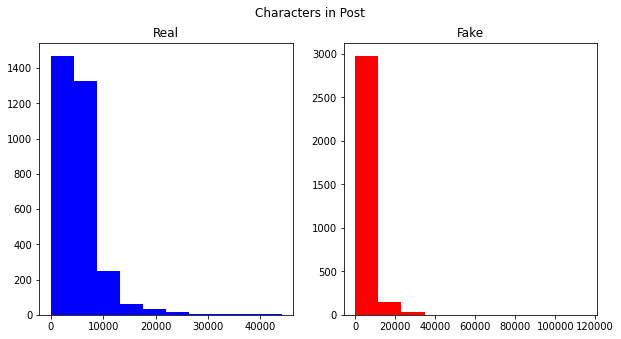

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
df_train_len=df_train[df_train['target']==1]['text'].str.len()
ax1.hist(df_train_len,color='blue')
ax1.set_title('Real')
df_train_len=df_train[df_train['target']==0]['text'].str.len()
ax2.hist(df_train_len,color='red',)
ax2.set_title('Fake')
fig.suptitle('Characters in Post')
plt.show()

#Roberta

In [ ]:
!pip install transformers

     |████████████████████████████████| 573kB 6.7MB/s 
     |████████████████████████████████| 3.7MB 19.8MB/s 
     |████████████████████████████████| 890kB 43.6MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=0caa865c5ce84d797278f370248ca4517c0c40d4977481bbddf664d191886cd0
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses
  Found existing installation: tokenizers 0.7.0
    Uninstalling tokenizers-0.7.0:
      Successfully uninstalled tokenizers-0.7.0


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tokenizers
import transformers
from tqdm import tqdm
from sklearn import metrics
from sklearn.model_selection import KFold
import re